# Introdução

O objetivo desse exercicio é utilizar o csv sobre as músicas mais ouvidas no spotify em 2023 e colocar em prática o que foi aprendido em aula sobre pandas, numpy e matplotlib. O arquivo, além de informar o nome, artista, data de lançamento e informações básicas sobre as músicas, vai além e mostra em quais playlist as músicas se encontram dentro e fora da plataforma spotify, qual o tom da música, batidas por minuto, quão dançável a música pode ser e muito mais

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("spotify.csv", encoding ="latin-1")

# Processamento, Tratamento e Visualizações

In [77]:
def processamento_df(df):
    # Visualizar dataframe
    df
    # mostrar informaçoes do df
    df.info()
    # mostrar colunas do df
    df.columns

    return df, df.info(), df.columns

In [78]:
# verificando se o retorno está correto
df, df.info(), df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

(                              track_name      artist(s)_name  artist_count  \
 0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
 1                                   LALA         Myke Towers             1   
 2                                vampire      Olivia Rodrigo             1   
 3                           Cruel Summer        Taylor Swift             1   
 4                         WHERE SHE GOES           Bad Bunny             1   
 ..                                   ...                 ...           ...   
 948                         My Mind & Me        Selena Gomez             1   
 949            Bigger Than The Whole Sky        Taylor Swift             1   
 950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
 951                        En La De Ella  Feid, Sech, Jhayco             3   
 952                                Alone           Burna Boy             1   
 
      released_year  released_month  released_day 

In [16]:
# há musicas da Beyonce na lista?
df_beyonce = df[df['artist(s)_name'].str.contains('Beyonc')]
df_beyonce

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
231,CUFF IT,Beyoncï¿,1,2022,7,29,7842,10,595900742,215,...,115,G,Major,78,64,69,4,0,7,14
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,57089066,34,...,126,C#,Major,78,20,70,1,0,16,4
863,BREAK MY SOUL,Beyoncï¿,1,2022,6,21,9724,0,354614964,222,...,115,C#,Minor,70,87,88,4,0,26,8
887,ALIEN SUPERSTAR,Beyoncï¿,1,2022,7,29,2688,0,171788484,39,...,122,A#,Minor,55,46,64,0,0,17,10


In [72]:
# há musicas com 3 artistas na lista?
df_tres = df.query('artist_count == 3')
df_tres.shape

(85, 24)

Text(0.5, 1.0, 'Número de músicas por quantidade de artistas')

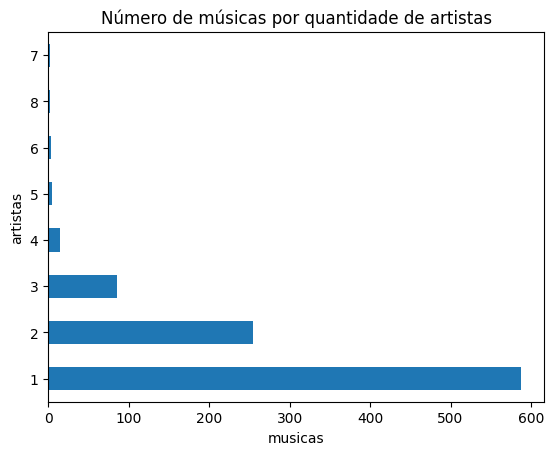

In [61]:
# gráfico quantidade de artistas
quantidade_artista = df['artist_count'].value_counts()
quantidade_artista.plot.barh()

plt.xlabel('musicas')
plt.ylabel('artistas')
plt.title('Número de músicas por quantidade de artistas')

In [32]:
# musica com 3 artistas e dancabilidade maior que 70?
df_condicoes = df[(df['artist_count'] == 3) & (df['danceability_%'] > 70)]
df_condicoes.shape

(52, 24)

In [19]:
# substituir valores na coluna da escala (tom maior ou menor)
df_escala = df['mode'].replace({'Major': 'Maior', 'Minor': 'Menor'})
df_escala

0      Maior
1      Maior
2      Maior
3      Maior
4      Menor
       ...  
948    Maior
949    Maior
950    Maior
951    Maior
952    Menor
Name: mode, Length: 953, dtype: object

In [75]:
# Agrupar musica por escala
agrupar_escala = df.groupby('mode')
musica_escala = agrupar_escala['track_name'].count()

print(musica_escala)

mode
Major    550
Minor    403
Name: track_name, dtype: int64


<Axes: ylabel='track_name'>

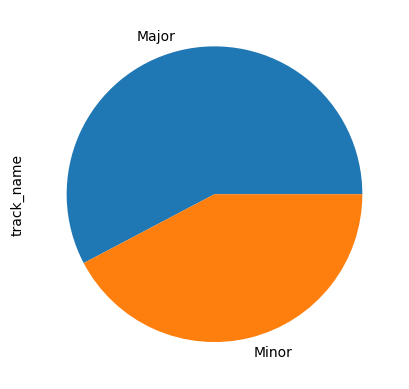

In [76]:
# grafico musica por escala
musica_escala.plot.pie()

In [35]:
# Agrupar musica por tom
agrupar_tom = df.groupby('key')
musica = agrupar_tom['track_name'].count()

print(musica)

key
A      75
A#     57
B      81
C#    120
D      81
D#     33
E      62
F      89
F#     73
G      96
G#     91
Name: track_name, dtype: int64


Text(0.5, 1.0, 'Quantidade de musicas por tom')

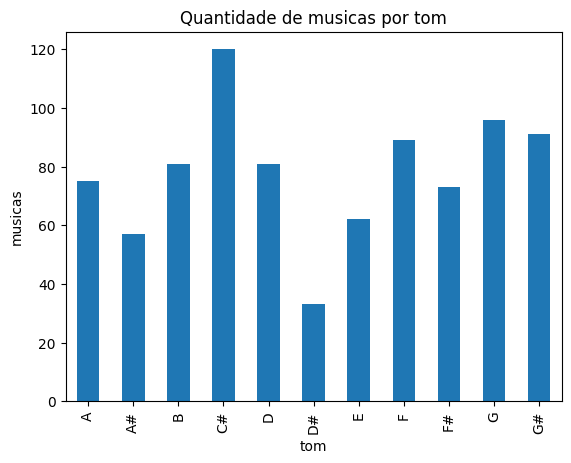

In [55]:
# gráfico musicas por tom
musica.plot.bar()

plt.xlabel('tom')
plt.ylabel('musicas')
plt.title('Quantidade de musicas por tom')


In [53]:
# media de artista por tom
media_tom = agrupar_tom['artist_count'].mean()
print(media_tom)

key
A     1.613333
A#    1.421053
B     1.691358
C#    1.633333
D     1.456790
D#    1.606061
E     1.435484
F     1.516854
F#    1.520548
G     1.614583
G#    1.483516
Name: artist_count, dtype: float64


In [45]:
# Agrupar musica por ano de lancamento
agrupar_ano = df.groupby('released_year')
ano = agrupar_ano['track_name'].count()

print(ano)

released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: track_name, dtype: int64


Text(0.5, 1.0, 'musicas por mes de lancamento')

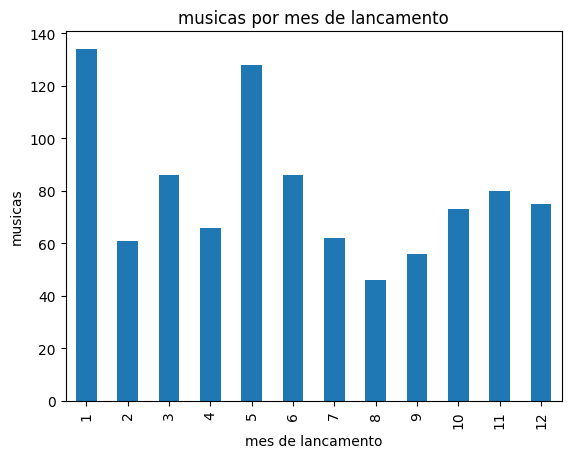

In [70]:
# grafico musica por mes de lancamento
agrupar_mes = df.groupby('released_month')
mes = agrupar_mes['track_name'].count()

mes.plot.bar()
plt.xlabel('mes de lancamento')
plt.ylabel('musicas')
plt.title('musicas por mes de lancamento')

In [20]:
# Mostrando as 10 primeiras linhas do df
df_slicing = df[:10]
df_slicing

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [7]:
# Traduzir para português
traducoes = {
    'track_name': 'nome_musica',
    'artist(s)_name': 'artista',
    'artist_count': 'numero_artistas_envolvidos',
    'released_year': 'ano_lancamento',
    'released_month': 'mes_lancamento',
    'released_day': 'dia_lancamento',
    'in_spotify_playlists': 'playlists_spotify',
    'in_spotify_charts': 'popularidade',
    'streams,in_apple_playlists': 'streams_apple_music',
    'in_apple_charts': 'posicao_apple',
    'in_deezer_playlists': 'playlists_deezer',
    'in_deezer_charts': 'posicao_deezer',
    'in_shazam_charts': 'posicao_shazam',
    'bpm': 'bpm',
    'key': 'tom',
    'mode': 'maior_menor',
    'danceability_%': 'dancavel',
    'valence_%': 'positividade',
    'energy_%': 'energia',
    'acousticness_%': 'som_acustico',
    'instrumentalness_%': 'instrumental',
    'liveness_%': 'ao vivo',
    'speechiness_%': 'palavras'
}

novas_colunas = []
for chave, valor in traducoes.items():
    novas_colunas.append(valor)

novas_colunas

['nome_musica',
 'artista',
 'numero_artistas_envolvidos',
 'ano_lancamento',
 'mes_lancamento',
 'dia_lancamento',
 'playlists_spotify',
 'popularidade',
 'streams_apple_music',
 'posicao_apple',
 'playlists_deezer',
 'posicao_deezer',
 'posicao_shazam',
 'bpm',
 'tom',
 'maior_menor',
 'dancavel',
 'positividade',
 'energia',
 'som_acustico',
 'instrumental',
 'ao vivo',
 'palavras']

In [71]:
df.columns = novas_colunas
df

ValueError: Length mismatch: Expected axis has 24 elements, new values have 23 elements

# Insights
É possível observar que o dataframe original possui 24 colunas e 953 linhas e toda a sua formatação está na lingua inglesa;

Uma das maiores artistas do século, Beyonce, tem 4 musicas na lista de músicas mais ouvidas de 2023;

Mais da metade das musicas estao em escala maior e grande parte em tom de C# (Dó sustenido);

Há 85 músicas com três artistas. A maioria das canções possuem apenas um, mas há músicas com até sete artistas contribuintes;

Há 52 músicas cin três artistas e porcentagem de dançabilidade maior que 70%;

Na lista, há musicas lançadas no período entre 1930 e 2023;

Janeiro e Maio foram os meses em que a maioria dessas musicas foram lançadas;

Tratar e visualizar gráficos com mais informações é mais complicado. Porém proporciona mais possibilidades de tratamento desses dados

